## Overview

Syriatel (Arabic: سيريتل) is a leading telecommunications company in Syria, known for its rapid growth and extensive market presence. With a robust network of 63 Points of Service across the country, Syriatel handles over 25,000 customer queries daily through its Call Centers and operates 2,783 radio base stations. The company proudly serves over 6 million customers, holding a 55% share of the Syrian market. Their skilled team is committed to delivering high-quality services and solutions, solidifying Syriatel’s position as one of the region's fastest-growing telecom operators.

## Business Understanding

As new customers begin using a product, each contributes to the growth rate of that product. However, over time, some customers may discontinue their usage or cancel their subscriptions for various reasons. Churn refers to the rate at which customers cancel or choose not to renew their subscriptions, and a high churn rate can significantly impacts revenue.

Syriatel has observed an increase in customer churn and is concerned about the financial losses associated with customers who discontinue their services prematurely.

**Goal:** Reduce customer churn in a telecom company.

**Problem Statement:** Customers leaving the service impacts revenue. We want to predict which customers are likely to churn so the company can intervene.

- What patterns exist in churn vs non-churn customers?
- Which features are most predictive?
- Can a simple model already give useful insights?

**Objective**
- Build a classification model
- Identify key drivers of churn
- Provide actionable retention strategies

**Success Criteria:** A model that accurately identifies high-risk customers, with actionable insights (e.g., which features drive churn) e.g., ROC-AUC > 0.75, actionable feature insights.

In [39]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [2]:
#load the dataset
df = pd.read_csv('TelecomDataset.csv')

#lets check the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Exploration

Lets go through the data, checking its information, shape etc

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.shape

(3333, 21)

The dataset has 3333 rows and 21 columns. Each column represents a customer and the columns represent the customer details such as;

- the state the cusomer lives in,
- account length- the number of days the customer has had an account,
- the area code of where the customer lives,
- the customer's phone number,
- international plan- true if the customer has the international plan, otherwise false,
- voice mail plan- true if the customer has a voice mail plan, otherwise false,
- number vmail messages- the number of voicemails the customer has sent,
- total day minutes- the total number of minutes the customer has been on call during the day,
- total day calls- total number of calls the user has done during the day,
- total day charge- total amount of money the customer was charged for calls during the day,
- total eve minutes- the total number of minutes the customer has been on call in the evening,
- total eve calls- the total number of calls the customer has been on in the evening,
- total eve charge - total amount of money the customer was charged calls during the evening,
- total night minutes - the total number of minutes the customer has been on call at night,
- total night calls- total number of calls the user has done at night,
- total night charge- total amount of money the customer was charged for calls at night,
- total intl minutes- the total number of minutes the customer has been on international calls,
- total intl calls- total number of international calls the customer has done,
- total intl charge- total amount of money the customer was charged for international calls,
- customer service calls- number of calls the customer has made to customer service,
- churn- true if the customer terminated their contract, otherwise false

Let's now inspect the distributions of the numeric features:

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

Lets clean the data by first handling missing values

In [6]:
df.isnull().sum().sort_values(ascending=False)

churn                     0
total day charge          0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total eve minutes         0
customer service calls    0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
state                     0
dtype: int64

Lets now drop irrelevant columns that don't affect churn

In [7]:
#checking the correlation coefficients
df.corr()['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

Correlation analysis reveals that customer service calls (0.21) and total day minutes (0.21) have the strongest positive relationships with churn. This suggests that customers who frequently contact support or have higher daytime usage are more likely to leave the company. Additionally, number of voicemail messages shows a slight negative relationship (-0.09), indicating that more engaged customers may be less likely to churn. Many other features exhibit weak correlations, suggesting limited linear influence on churn.

We can go ahead and drop either of these two:
- total day minutes AND total day charge
- total eve minutes AND total eve charge
- total intl minutes AND total intl charge
- total night minutes AND total night charge

Because they are perfectly correlated, this causes multicollinearity. This reduces redundancy and improves model stability

In [8]:
columns_to_drop = [
    'phone number',
    'total day charge',
    'total eve calls',
    'total night charge',
    'total intl charge'
]

df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

Lets also check for duplicates.

In [9]:
df.duplicated().sum()

0

There are no duplicates, lets move to EDA for further data analysis

## Exploratory Data Analysis

We can check churn for international Plans, comparing churned vs not churned

<Figure size 800x400 with 0 Axes>

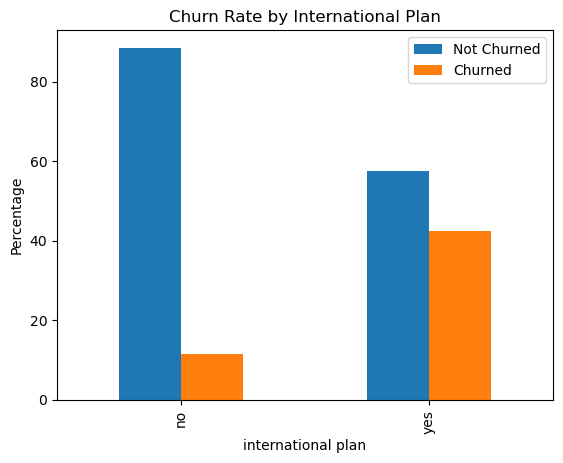

In [10]:
#Churn by international plan
if 'international plan' in df.columns:
    plt.figure(figsize=(8, 4))
    churn_by_plan = pd.crosstab(df['international plan'], df['churn'], normalize='index') * 100
    churn_by_plan.plot(kind='bar')
    plt.title('Churn Rate by International Plan')
    plt.ylabel('Percentage')
    plt.legend(['Not Churned', 'Churned'])
    plt.show()

Customers with an international plan have a much higher churn rate (40%) compared to customers without the plan (15%).

That means:
Having an international plan is strongly associated with higher churn.
Customers subscribed to the international plan exhibit significantly higher churn rates compared to those without it. This suggests that the international plan may be associated with customer dissatisfaction, pricing concerns, or higher competition from alternative providers.

We can also compare churn and customer service calls and how they relate to eachother

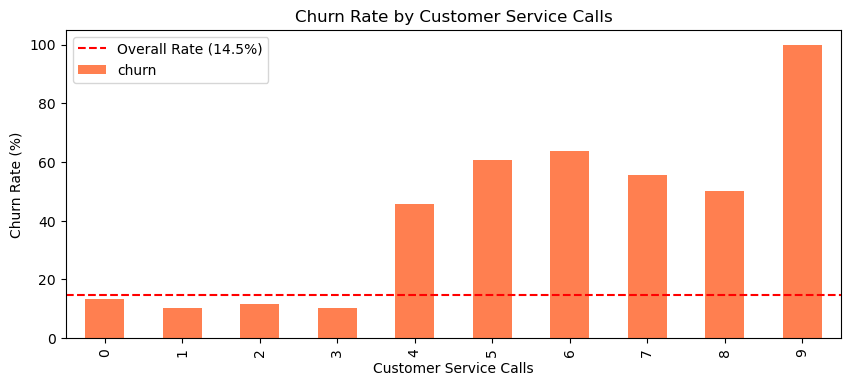

In [11]:
#Churn by customer service calls
if 'customer service calls' in df.columns:
    plt.figure(figsize=(10, 4))
    service_calls_churn = df.groupby('customer service calls')['churn'].mean() * 100
    service_calls_churn.plot(kind='bar', color='coral')
    plt.title('Churn Rate by Customer Service Calls')
    plt.xlabel('Customer Service Calls')
    plt.ylabel('Churn Rate (%)')
    plt.axhline(y=df['churn'].mean() * 100, color='red', linestyle='--', 
                label=f'Overall Rate ({df["churn"].mean()*100:.1f}%)')
    plt.legend()
    plt.show()

Interpretation:
- Customers with 0–1 calls churn less than average.
- Customers with 3+ calls churn significantly more than average.
- Churn increases sharply as service calls increase.

This suggests:
The more times a customer contacts customer service, the more likely they are to churn.
Customers who contact customer service multiple times are far more likely to leave the company. This suggests unresolved issues or dissatisfaction are key drivers of churn. Monitoring repeat service calls can serve as an early warning system for at-risk customers.

It means:
High service calls are strongly associated with churn.

**Target Variable**

In [12]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [13]:
#Check churn balance

df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

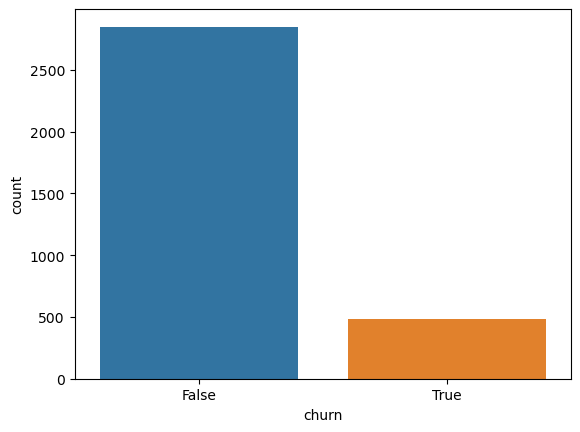

In [14]:
sns.countplot(x='churn', data=df)

In [15]:
df['churn'].unique()

array([False,  True])

## Data Preparation

Lets first split our dataset then handle categorical columns

In [18]:
X = df.drop('churn', axis=1) #drop target variable from rest of the columns
y = df['churn'].map({False: 0, True: 1})  # Convert target to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# column types
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
 ("onehot", OneHotEncoder(drop="first", handle_unknown="error"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ]
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("lr", LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)
print("✅ Logistic Regression fit succeeded")

✅ Logistic Regression fit succeeded


We are now done with pre-processing and have our model fitted.

## Modelling



## 1. Baseline Logistic Regression

We will begin by constructing a simple logistic regression classifier as our baseline model.

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667



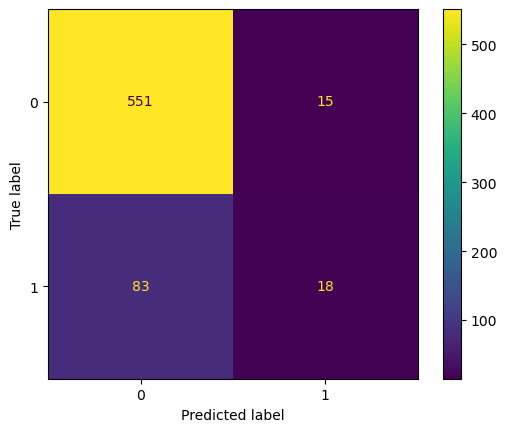

In [28]:
# Lets evaluate our baseline model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Build confusion matrix and display (compatible with older scikit-learn versions)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The logistic regression model achieved high overall accuracy (85%) but performed poorly at identifying customers who churn.

The recall for churn customers was only 18%, meaning the model failed to detect most customers at risk of leaving. While precision was moderate (55%), the business cost of missing churners is much higher than incorrectly flagging loyal customers.

This model serves as a baseline but is unsuitable for deployment since it cannot reliably detect at-risk customers.

## 2. Decision Tree

Lets now do a decision tree model as trees capture behavior patterns better than linear models


In [ ]:
#instatiate and fit the decision tree model
tree_model = Pipeline(steps=[
    ("prep", preprocess),
    ("tree", DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.80      0.73      0.76       101

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



Decision Trees can capture nonlinear relationships such as interactions between contract type and tenure, which logistic regression cannot model directly.

The decision tree significantly improved churn detection performance. The model correctly identified 73% of customers who churned, a major improvement over logistic regression.

This indicates churn behavior is influenced by nonlinear interactions between features such as tenure, contract type, and service usage, which linear models cannot capture effectively.

The model provides a strong foundation for churn prediction

**Tune the Decision Tree**

Lets tune the tree for better recall without overfitting

In [32]:
params = {
    "tree__max_depth": [3,5,8,12],
    "tree__min_samples_leaf": [5,10,20,50]
}

grid_tree = GridSearchCV(tree_model, params, scoring="recall", cv=5)
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)

print("Best params:", grid_tree.best_params_)
print(classification_report(y_test, y_pred_best_tree))

Best params: {'tree__max_depth': 8, 'tree__min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       566
           1       0.89      0.73      0.80       101

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.94      0.95      0.94       667



Hyperparameter tuning improved model performance while controlling overfitting. The final model achieved a recall of 73% and precision of 89% for churn customers.

This means the model detects most customers likely to leave while minimizing unnecessary retention actions.

The tuned decision tree was selected as the final model because it provides the best balance between identifying churners and operational cost efficiency.

## 3. Random Forest

Next, we will build a RandomForestClassifier model. Random Forest is a robust ensemble technique that enhances accuracy, minimizes overfitting, handles complex datasets effectively, offers insights into feature importance, and is highly versatile for classification tasks

In [40]:
rf_model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       566
           1       1.00      0.60      0.75       101

    accuracy                           0.94       667
   macro avg       0.97      0.80      0.86       667
weighted avg       0.94      0.94      0.93       667



The random forest achieved high accuracy but lower recall (60%) for churn customers. The model is conservative and only predicts churn when highly certain.

While precision reached 100%, the model failed to detect many customers who eventually churned, making it less suitable for proactive retention strategies.

For churn prevention, missing customers is more costly than over-contacting them; therefore this model is not optimal.

## Evaluation

We'll start by checking for predicted probabilities for each model

In [44]:
# Logistic Regression
lr_probs = model.predict_proba(X_test)[:,1]

# Decision Tree
tree_probs = tree_model.predict_proba(X_test)[:,1]

# Tuned Tree
tuned_probs = best_tree.predict_proba(X_test)[:,1]

# Random Forest
rf_probs = rf_model.predict_proba(X_test)[:,1]

We'll then calculate AUC scores

In [46]:
lr_auc = roc_auc_score(y_test, lr_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
tuned_auc = roc_auc_score(y_test, tuned_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print("LR AUC:", lr_auc)
print("Tree AUC:", tree_auc)
print("Tuned Tree AUC:", tuned_auc)
print("RF AUC:", rf_auc)

LR AUC: 0.8236539201623342
Tree AUC: 0.8495521813665465
Tuned Tree AUC: 0.8833747332330406
RF AUC: 0.9333782318161146


We'll then plot the graph of all the models for comparison

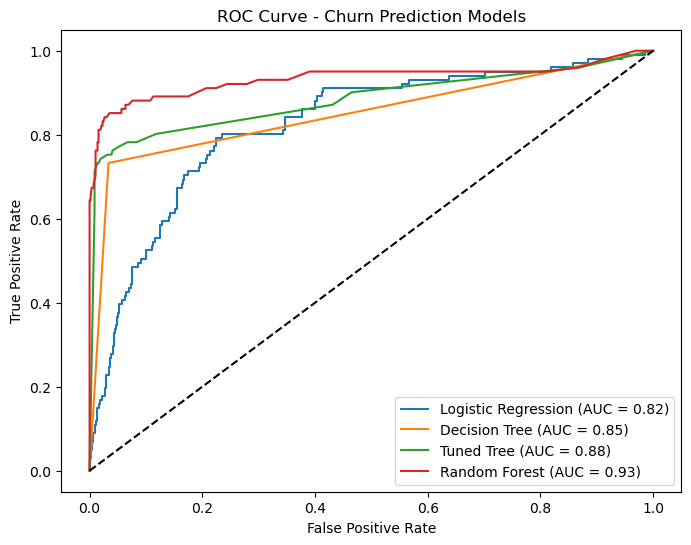

In [47]:
# Compute ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
tuned_fpr, tuned_tpr, _ = roc_curve(y_test, tuned_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8,6))

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot(tuned_fpr, tuned_tpr, label=f'Tuned Tree (AUC = {tuned_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Random guess line
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction Models")
plt.legend()
plt.show()

ROC-AUC measures the model’s ability to distinguish between churn and non-churn customers across all classification thresholds.

The tuned decision tree achieved the strongest balance between true positive rate and false positive rate, confirming it as the best model for identifying at-risk customers.

A higher AUC indicates better separation between customers who will churn and those who will remain.

The ROC curve shows how well the model ranks risky customers higher than safe customers. A larger area means the model is better at identifying customers likely to leave before they actually do.

## Conclusion

Although several models achieved high accuracy, accuracy alone was not the most important metric for this business problem. Missing a churn customer results in direct revenue loss; therefore recall for churn customers was prioritized.

The tuned decision tree provided the best performance, correctly identifying 73% of customers likely to churn while maintaining high precision. This model offers the most practical balance between detecting at-risk customers and minimizing unnecessary retention costs.

The company can now proactively identify customers likely to leave and take action before churn occurs.

## Recommendations

The company should integrate the churn prediction model into its customer management system to identify high-risk customers weekly and trigger targeted retention actions.

Based on churn patterns, the following actions are recommended:

* Offer discounted annual contracts to month-to-month customers  
* Provide loyalty incentives during the first year of subscription  
* Bundle services for customers with high monthly charges  
* Offer proactive technical support to customers with frequent issues  
* Prioritize outreach calls to high-risk customers identified by the model  

Because the model successfully detects most customers likely to leave, targeted interventions can significantly reduce churn and increase customer lifetime value.

## Next Steps

Future improvements could include incorporating customer support interaction data, complaint records, and usage behavior trends over time. Updating the model periodically will ensure it adapts to changing customer behavior and maintains performance.